In [2]:
import numpy as np
import qutip as qt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import DensityMatrix, partial_trace
from qiskit.circuit.library import QFT
from random import randint
import matplotlib.pyplot as plt
from time import time


from tools.classical import *
from tools.quantum import *
from boltzmann import *

[ 0.          0.07843137  0.15686275  0.23529412  0.31372549  0.39215686
  0.47058824  0.54901961  0.62745098  0.70588235  0.78431373  0.8627451
  0.94117647  1.01960784  1.09803922  1.17647059  1.25490196  1.33333333
  1.41176471  1.49019608  1.56862745  1.64705882  1.7254902   1.80392157
  1.88235294  1.96078431  2.03921569  2.11764706  2.19607843  2.2745098
  2.35294118  2.43137255  2.50980392  2.58823529  2.66666667  2.74509804
  2.82352941  2.90196078  2.98039216  3.05882353  3.1372549   3.21568627
  3.29411765  3.37254902  3.45098039  3.52941176  3.60784314  3.68627451
  3.76470588  3.84313725  3.92156863  4.          4.07843137  4.15686275
  4.23529412  4.31372549  4.39215686  4.47058824  4.54901961  4.62745098
  4.70588235  4.78431373  4.8627451   4.94117647  5.01960784  5.09803922
  5.17647059  5.25490196  5.33333333  5.41176471  5.49019608  5.56862745
  5.64705882  5.7254902   5.80392157  5.88235294  5.96078431  6.03921569
  6.11764706  6.19607843  6.2745098   6.35294118  6.4

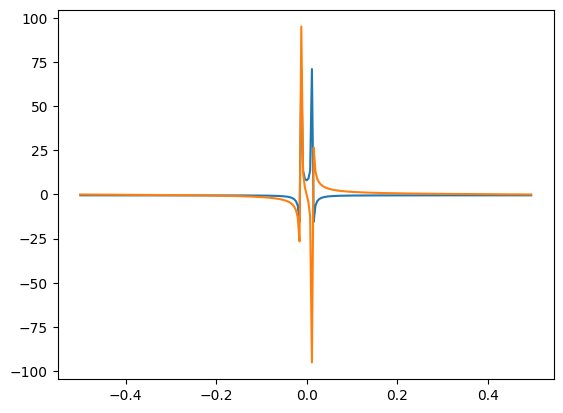

In [22]:
import matplotlib.pyplot as plt

N = 256
t = np.fft.ifftshift(np.linspace(-100, 100, N))
t = np.linspace(0, 20, N)
print(t)

# sp = np.fft.fft(np.exp(-t**2))
sp = np.fft.fftshift(np.fft.fft(np.sin(t)))

freq = np.fft.fftshift(np.fft.fftfreq(t.shape[-1]))
print(freq)

plt.plot(freq, sp.real, freq, sp.imag)

plt.show()

In [42]:
damage = lambda stab, type, power, level: ((2*level / 5 + 2) * power / 50 + 2) * stab * type

stab1 = 1.
type1 = 1.
power1 = 80

stab2 = 1.5
type2 = 0.5
power2 = 80 * 4 / 3

level = 100

print(f'Expected damage 1: {damage(stab1, type1, power1, level)}')
print(f'Expected damage 2: {damage(stab2, type2, power2, level)}')

ratio = damage(stab1, type1, power1, level) / damage(stab2, type2, power2, level)
print(f'Ratio: {ratio}')

quick_damage = lambda stab, type, power, level: ((2*level / 5 ) * power / 50) * stab * type
print(f'Quick damage 1: {quick_damage(stab1, type1, power1, level)}')
print(f'Quick damage 2: {quick_damage(stab2, type2, power2, level)}')

quick_ratio = quick_damage(stab1, type1, power1, level) / quick_damage(stab2, type2, power2, level)
print(f'Quick ratio: {quick_ratio}')


Expected damage 1: 69.2
Expected damage 2: 68.69999999999999
Ratio: 1.0072780203784573
Quick damage 1: 64.0
Quick damage 2: 64.0
Quick ratio: 1.0


In [6]:
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
num_qubits = 12
coeffs = [1, 1, 1]
t0 = time()
hamiltonian_qt = hamiltonian_matrix([X, X], [Y, Y], [Z, Z], coeffs=coeffs, num_qubits=num_qubits)
print("Time to build Hamiltonian matrix: ", time()-t0)

Time to build Hamiltonian matrix:  1.297010898590088


In [3]:
np.random.seed(666)

def matrix_multiply():
    rows = 10000  # Set the number of rows
    cols = 10000  # Set the number of columns

    # Define two matrices of size rows x cols
    mat1 = np.random.rand(rows, cols)
    mat2 = np.random.rand(rows, cols)

    # Multiply matrices
    result = np.dot(mat1, mat2)

    return result

# t0 = time()
# res = matrix_multiply()
# print("Time taken for matrix multiplication: ", time()-t0)

rows = 10000  # Set the number of rows
cols = 10000  # Set the number of columns
mat1 = np.random.rand(rows, cols)
mat2 = np.random.rand(rows, cols)

# teinsum = time()
# res_einsum = np.einsum('ij, jk -> ik', mat1, mat2, optimize=True)
# print(time() - teinsum)

tmatmul = time()
np.matmul(mat1, mat2)
print(time() - tmatmul)
qt.tensor
timeat = time()
mat1 @ mat2
print(time() - timeat)

11.261979818344116
11.548596858978271


In [6]:


# Define the bounds for random values
coeff_lower_bound = 0
coeff_upper_bound = 1
num_points = 10  # Number of random points in each dimension

# Generate random values for each dimension
coeff_xx = np.random.uniform(coeff_lower_bound, coeff_upper_bound, num_points)
coeff_yy = np.random.uniform(coeff_lower_bound, coeff_upper_bound, num_points)
coeff_zz = np.random.uniform(coeff_lower_bound, coeff_upper_bound, num_points)
coeff_z = np.random.uniform(coeff_lower_bound, coeff_upper_bound, num_points)

# Create meshgrid and reshape it
coeff_mesh = np.array(np.meshgrid(coeff_xx, coeff_yy, coeff_zz, coeff_z)).T.reshape(-1, 4)

print(coeff_mesh)


[[0.70043712 0.20024754 0.0232363  0.88889931]
 [0.70043712 0.74415417 0.0232363  0.88889931]
 [0.70043712 0.192892   0.0232363  0.88889931]
 ...
 [0.50806631 0.11285765 0.32569065 0.21940924]
 [0.50806631 0.11095367 0.32569065 0.21940924]
 [0.50806631 0.24766823 0.32569065 0.21940924]]


In [12]:
rxx_circ = QuantumCircuit(2, name="RXX")
rxx_circ.rxx(1.2, 0, 1)
CRXX = rxx_circ.control(1)
circ = QuantumCircuit(3)
circ.compose(CRXX, [0, 1, 2], inplace=True)
print(circ)
tr_circ = transpile(circ, basis_gates=['cx', 'rx', 'ry'], optimization_level=3)
tr_circ = transpile(tr_circ, basis_gates=['rxx', 'rx', 'ry'], optimization_level=3)
print(tr_circ)


             
q_0: ───■────
     ┌──┴───┐
q_1: ┤0     ├
     │  RXX │
q_2: ┤1     ├
     └──────┘
       ┌────────┐  ┌─────────┐ ┌───────────┐             ┌───────────┐»
q_0: ──┤ Rx(-π) ├──┤ Ry(π/2) ├─┤0          ├─────────────┤0          ├»
     ┌─┴────────┴┐┌┴─────────┴┐│  Rxx(π/2) │┌───────────┐│           │»
q_1: ┤ Ry(-3π/4) ├┤ Rx(-3π/2) ├┤1          ├┤ Ry(-3π/4) ├┤  Rxx(π/2) ├»
     ├───────────┤└───────────┘└───────────┘└───────────┘│           │»
q_2: ┤ Ry(-3π/4) ├───────────────────────────────────────┤1          ├»
     └───────────┘                                       └───────────┘»
«      ┌───────┐                                      ┌───────────┐»
«q_0: ─┤ Ry(π) ├──────────────────────────────────────┤0          ├»
«      └───────┘              ┌───────────┐┌─────────┐│           │»
«q_1: ────────────────────────┤0          ├┤ Rx(π/4) ├┤  Rxx(π/2) ├»
«     ┌──────────┐┌──────────┐│  Rxx(π/2) │├─────────┤│           │»
«q_2: ┤ Rx(-π/2) ├┤ Ry(3π/4) ├┤1          ├┤ Ry(π/4) 

In [26]:
all_zero_ancillas_state = qt.tensor([qt.basis(2, 0)] * (2 + 6))
all_zero_ancillas_state = all_zero_ancillas_state * all_zero_ancillas_state.dag()
print(all_zero_ancillas_state)
all_zero_ancillas_state = Statevector(all_zero_ancillas_state.full())

circ = QuantumCircuit(8)
circ.initialize(all_zero_ancillas_state)


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2]], shape = (256, 256), type = oper, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


QiskitError: 'Invalid input: not a vector or column-vector.'

In [5]:
# jump_ops = [Operator(Pauli('X'))]
# rand_jump = np.random.choice(jump_ops)
import numpy as np

# Assuming you have a list of numpy matrices called matrix_list
# For example, let's say matrix_list contains 3 matrices
matrix_list = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]), np.array([[9, 10], [11, 12]])]

# Generate a random index to select a matrix from matrix_list
random_index = np.random.randint(0, len(matrix_list))

# Select the matrix using the random index
random_matrix = matrix_list[random_index]

print(random_matrix)

print(random_matrix)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [10]:
decimal_time_labels = list(range(2**(6 - 1)))
decimal_time_labels.extend(list(range(- 2**(6 - 1), 0)))

N_labels = np.arange(2**6 / 2, dtype=int)
N_labels_neg = np.arange(- 2**6 / 2, 0, dtype=int)
N_labels = np.concatenate((N_labels, N_labels_neg))
print(N_labels)
decimal_time_labels

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31 -32 -31 -30 -29
 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1]

In [40]:
spectrum = np.array([-4,    -2, -1.3, -0.1,     1,  2.1,     2.8895,  4])
eps = 0.1
signed = False
"""Rescale and shift to get spectrum in [0, 1] or [0, 1 - eps]
"""
# eigenenergies = np.linalg.eigvalsh(hamiltonian)
# smallest_eigval = np.round(eigenenergies[0])
smallest_eigval = spectrum[0]
# largest_eigval = np.round(eigenenergies[-1])
largest_eigval = spectrum[-1]

# Rescaling factor and shift for [-0.5, 0.5]
rescaling_factor = largest_eigval - smallest_eigval
if eps == 0:
    shift = -(largest_eigval + smallest_eigval) / (2 * rescaling_factor)
    
if eps != 0:
    rescaling_factor *= 2/ (1 - eps) # [-0.5, 0.5 - eps]
    shift = - (largest_eigval - smallest_eigval * eps) / (2 * (largest_eigval - smallest_eigval))
# Centre spectrum around 0: 

if signed == False:  # shift to [0, 1]
    shift += 0.5

rescaled_spectrum = (spectrum) / rescaling_factor + shift
rescaled_spectrum

array([0.        , 0.1125    , 0.151875  , 0.219375  , 0.28125   ,
       0.343125  , 0.38753437, 0.45      ])

In [134]:
num_qubits = 4
num_ancillas = 2
qr_sys = QuantumRegister(num_qubits, 'sys')
qr_anc = QuantumRegister(num_ancillas, 'anc')

# np.random.seed(666)
randstate_better = np.zeros(2**(num_qubits))
randstate_better[np.random.choice(2**num_qubits, 2**num_qubits//2, replace=False)] = 1
randstate_better /= np.linalg.norm(randstate_better)

circ = QuantumCircuit(qr_anc, qr_sys)
# random circuit
circ.initialize(randstate_better, qr_sys)

statevector = Statevector(circ).data

dm = DensityMatrix(circ)

I = qt.qeye(2)
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()

tensor_list = pad_term([X, X], num_qubits=num_qubits, position=1)
print(list(range(num_qubits+ num_ancillas))[num_ancillas:])
print(list(range(num_ancillas, num_qubits+ num_ancillas)))

op = (qt.tensor(tensor_list).full())
padded_op = qt.tensor([qt.Qobj(op), qt.qeye(2**num_ancillas)])
expval_qiskit_dm = dm.expectation_value(op, list(range(num_qubits+ num_ancillas))[num_ancillas:])
expval = statevector.conj().T @ padded_op.full() @ statevector
print('Qiskit DM:', expval_qiskit_dm)
print('Statevector:', expval)

sys_dm = partial_trace(dm, [0, 1])
expval_from_partial_dm = np.trace(sys_dm.data @ op)
print('Partial trace:', expval_from_partial_dm)

another_expval_from_partial_dm = sys_dm.expectation_value(op)
print('Another partial trace:', another_expval_from_partial_dm)

[2, 3, 4, 5]
[2, 3, 4, 5]
Qiskit DM: (0.2499999999999998+0j)
Statevector: (0.24999999999999994+0j)
Partial trace: (0.24999999999999978+0j)
Another partial trace: (0.24999999999999978+0j)


In [7]:
num_energy_bits = 6
num_qubits = 3
zerozero = np.array([[1, 0], [0, 0]])
padded_zerozero = np.kron(np.eye(2**num_qubits), zerozero)
padded_zerozero = np.kron(padded_zerozero, np.eye(2**num_energy_bits))
padded_zerozero

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
padded_tensor_list = [qt.Qobj(np.eye(2**num_qubits)), qt.Qobj(zerozero), qt.Qobj(np.eye(2**num_energy_bits))]
qt_padded = qt.tensor(padded_tensor_list)

dist = np.linalg.norm(qt_padded.full() - padded_zerozero)
dist

0.0

In [23]:
num_qubits = 5
coeffs = [1.5, 1.2, 0.6, 0.9]
theta = np.pi / (-0.5)

inverse_trotter_step_circ = inverse_trotter_step_heisenberg(num_qubits, coeffs, symbreak=True)
trotter_step_circ = trotter_step_heisenberg(num_qubits, coeffs, symbreak=True)
# inverse_trotter_step_circ.assign_parameters([-theta], inplace=True)
# trotter_step_circ.assign_parameters([theta], inplace=True)
# prev_inverse_trotter_step_circ = trotter_step_heisenberg(num_qubits, coeffs, symbreak=True)
# prev_inverse_trotter_step_circ.assign_parameters([-theta], inplace=True)

# prev_inverse_op = Operator(prev_inverse_trotter_step_circ)
# inverse_op = Operator(inverse_trotter_step_circ)
# op = Operator(trotter_step_circ)

# distance_to_id = np.linalg.norm(op.data @ inverse_op.data - np.eye(2**num_qubits))
# print(f'Distance with inverse Trotter: {distance_to_id}')
# distance_to_id_prev = np.linalg.norm(op.data @ prev_inverse_op.data - np.eye(2**num_qubits))
# print(f'Distance prev: {distance_to_id_prev}')


In [24]:
num_trotter_steps = 10
T = 1
total_time = 2 * np.pi * T
U = ham_evol(num_qubits, trotter_step=trotter_step_circ, num_trotter_steps=num_trotter_steps, time=total_time)
U_dag = ham_evol(num_qubits, trotter_step=inverse_trotter_step_circ, num_trotter_steps=num_trotter_steps, time=-total_time)
U_op = Operator(U)
U_dag_op = Operator(U_dag)

In [26]:
dist_to_id_evol = np.linalg.norm(U_op.data @ U_dag_op.data - np.eye(2**num_qubits))
print(f'Distance with evolution: {dist_to_id_evol}')

Distance with evolution: 3.2289662155096717e-14


In [5]:
num_energy_bits = 6
cr_energy = ClassicalRegister(num_energy_bits, name='cr_energy')
cr_boltzmann = ClassicalRegister(1, name='cr_boltz')
bithandler = BitHandler([cr_energy, cr_boltzmann])

counts = {'100100 1': 471, '111100 1': 216, '111101 1': 136, '100101 1': 130, '100011 1': 42, '111011 1': 3, '101011 1': 1, '101010 1': 1}
bithandler.measured_counts = counts
energy_counts = bithandler.get_counts_for_creg(cr_energy)
print(energy_counts)
boltzmann_counts = bithandler.get_counts_for_creg(cr_boltzmann)
print(boltzmann_counts)
# phase_bits = list(energy_counts.keys())[0] # take the most often obtaned result
# phase_bits_shots = energy_counts[phase_bits]

{'001001': 471, '111001': 216, '111011': 136, '001011': 130, '000111': 42, '110111': 3, '010111': 1, '010101': 1}
{'1': 1000}


In [3]:
num_energy_bits = 4
cr_energy = ClassicalRegister(num_energy_bits, name='w')
cr_boltzmann = ClassicalRegister(1, name='b')
bithandler = BitHandler([cr_boltzmann, cr_energy])

counts = {'1010 0': 298, '1001 1': 212, '1111 1': 177, '0000 0': 108, '1010 1': 62, '1011 0': 20, '1111 0': 19}
bithandler.measured_counts = counts
counts_for_energy = bithandler.get_counts_for_crreg(cr_energy)
print(counts_for_energy)

{'1010': 360, '1001': 212, '1111': 196, '0000': 108, '1011': 20}


In [17]:
num_qubits = 5
X_qt = qt.sigmax()
Y_qt = qt.sigmay()
Z_qt = qt.sigmaz()
coeffs = [1, 1, 1, 1]
hamiltonian_qt = hamiltonian_matrix([X_qt, X_qt], [Y_qt, Y_qt], [Z_qt, Z_qt], coeffs=coeffs, num_qubits=num_qubits, symbreak_term=[Z_qt])
spectrum, eigenstates = np.linalg.eigh(hamiltonian_qt)
print(f'Coeffs used: {coeffs} for spectrum {spectrum}')
eig_index = 10
eigenstate = eigenstates[:, eig_index]  #! 
exact_energy = spectrum[eig_index]
print(f'Energy to predict {exact_energy}')

expval = eigenstate.conj().T @ hamiltonian_qt @ eigenstate
print(expval)

expval_qt = qt.expect(qt.Qobj(hamiltonian_qt), qt.Qobj(eigenstate))
print(expval_qt)



Coeffs used: [1, 1, 1, 1] for spectrum [-8.41480675e+00 -8.01149686e+00 -7.45710970e+00 -6.56278848e+00
 -4.82842712e+00 -3.76446278e+00 -3.46410162e+00 -3.10903996e+00
 -2.56016642e+00 -2.48908833e+00 -1.72700584e+00 -1.54375254e+00
 -1.12310563e+00 -3.68457240e-01 -7.30967063e-16 -6.65773340e-16
  8.28427125e-01  9.50705136e-01  1.02497194e+00  1.68545843e+00
  1.85582806e+00  2.00000000e+00  2.57314158e+00  3.08156908e+00
  3.46410162e+00  3.87693371e+00  4.00000000e+00  4.00000000e+00
  4.84875524e+00  6.11081172e+00  7.12310563e+00  8.00000000e+00]
Energy to predict -1.727005838385661
[[-1.72700584+0.j]]
-1.7270058383856617


In [15]:
import numpy as np

# Define two matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
a = np.array([[1, 0], [0, 1]])
b = a

# Compute the Kronecker product
result = np.kron(A, B)
res = np.kron(a, b)
result2 = np.tensordot(A, B, axes=0)
res2 = np.tensordot(a, b, axes=0)

# Compute the tensor product using np.einsum
result3 = np.einsum('ij,kl->ikjl', A, B).reshape(A.shape[0] * B.shape[0], A.shape[1] * B.shape[1])
res3 = np.einsum('ij,kl->ikjl', a, b).reshape(a.shape[0] * b.shape[0], a.shape[1] * b.shape[1])
print(result)
# print(result2.reshape(4, 4))
print(result3)

print(res)
# print(res2.reshape(4, 4))
print(res3)

[[ 5  6 10 12]
 [ 7  8 14 16]
 [15 18 20 24]
 [21 24 28 32]]
[[ 5  6 10 12]
 [ 7  8 14 16]
 [15 18 20 24]
 [21 24 28 32]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [5]:
circ = QuantumCircuit(3)
circ.h(range(3))
circ.global_phase = 2
big_circ = QuantumCircuit(4)
big_circ.compose(circ, range(3), inplace=True)

print(big_circ)

add_phase = [[]]

global phase: 2
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘
q_3: ─────
          


In [18]:
bin(-5)

'-0b101'

In [4]:
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()

num_qubits = 5
H = hamiltonian_matrix([X, X], [Y, Y], [Z, Z], [X, Z, Z], num_qubits=num_qubits)
eigvals = np.linalg.eigvalsh(H)
print(eigvals)
shifted_H = shift_spectrum(H)
shifted_eigvals = np.linalg.eigvalsh(shifted_H)
print(shifted_eigvals)

print(np.isclose(eigvals + np.abs(eigvals[0]), shifted_eigvals))

qr0 = QuantumRegister(1, 'qr0')
qr1 = QuantumRegister(2, 'qr1')
qrsys = QuantumRegister(num_qubits, 'sys')
qr3 = QuantumRegister(4, 'q3')
qr_r = QuantumRegister(3, 'qr_r')

circ = QuantumCircuit(qrsys)
qr_index = circ.qregs.index(qrsys)
print(qr_index)

print(circ.qregs)


energy = energy_from_full_state(circ, H, subspace_qubits=[qrsys], qr_index=qr_index)
energy

[-9.11961148e+00 -9.11961148e+00 -6.47213595e+00 -6.47213595e+00
 -4.47213595e+00 -4.47213595e+00 -4.38516481e+00 -3.33653707e+00
 -3.33653707e+00 -3.23606798e+00 -3.23606798e+00 -2.60555128e+00
 -1.00895946e-15 -3.40718886e-16  6.80517146e-16  9.91538347e-16
  1.23606798e+00  1.23606798e+00  2.47213595e+00  2.47213595e+00
  2.57260505e+00  2.57260505e+00  2.76393202e+00  2.76393202e+00
  3.88354350e+00  3.88354350e+00  4.47213595e+00  4.47213595e+00
  4.60555128e+00  6.38516481e+00  7.23606798e+00  7.23606798e+00]
[-1.47665609e-06 -1.47665607e-06  2.64747405e+00  2.64747405e+00
  4.64747405e+00  4.64747405e+00  4.73444519e+00  5.78307293e+00
  5.78307293e+00  5.88354202e+00  5.88354202e+00  6.51405872e+00
  9.11961000e+00  9.11961000e+00  9.11961000e+00  9.11961000e+00
  1.03556780e+01  1.03556780e+01  1.15917460e+01  1.15917460e+01
  1.16922151e+01  1.16922151e+01  1.18835420e+01  1.18835420e+01
  1.30031535e+01  1.30031535e+01  1.35917460e+01  1.35917460e+01
  1.37251613e+01  1.5504

5.0

In [4]:
full_obs = qt.qeye(1)
full_obs = qt.tensor([full_obs, qt.qeye(2)])
print(full_obs)

Quantum object: dims = [[1, 2], [1, 2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]


[-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, -8, -7, -6, -5, -4, -3, -2, -1]
[9.58758528e-01 2.00966705e-01 1.85083937e-03 7.48933209e-07
 1.33151846e-11 1.04011424e-17 3.56980615e-25 5.38316844e-34
 3.56665457e-44 5.38316844e-34 3.56980615e-25 1.04011424e-17
 1.33151846e-11 7.48933209e-07 1.85083937e-03 2.00966705e-01]


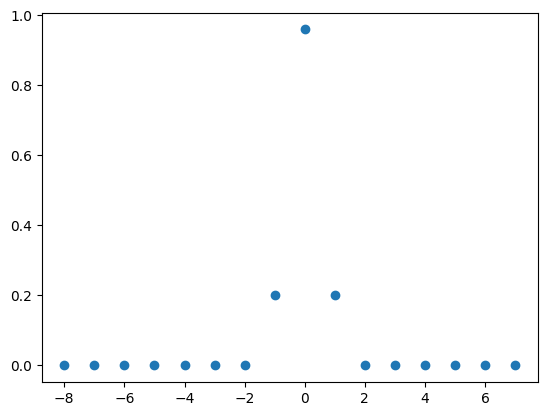

In [2]:
num_energy_bits = 4
sigma = num_energy_bits / 10
decimal_time_labels = list(range(- 2 ** (num_energy_bits - 1), 2 ** (num_energy_bits - 1)))
print(decimal_time_labels)

decimal_time_labels2 = list(range(2**(num_energy_bits - 1)))
decimal_time_labels2.extend(list(range(- 2**(num_energy_bits - 1), 0)))
print(decimal_time_labels2)

gauss_amplitude = lambda decimal_time: np.exp(-(decimal_time ** 2) / (4 * sigma ** 2))
amplitudes = [gauss_amplitude(decimal_time) for decimal_time in decimal_time_labels]
amplitudes /= np.linalg.norm(amplitudes)
amplitudes2 = [gauss_amplitude(decimal_time) for decimal_time in decimal_time_labels2]
amplitudes2 /= np.linalg.norm(amplitudes2)
print(amplitudes2)
# plot amplitudes, amplitudes2 as dots
# plt.scatter(decimal_time_labels, amplitudes)
plt.scatter(decimal_time_labels2, amplitudes2)

